# California Housing Dataset Analysis
## Machine Learning Assignment - Comprehensive Analysis

This notebook contains a systematic analysis of the California Housing Dataset using various regression techniques and statistical methods.


## Phase 1: Dataset Loading [15 points]

Load dataset from sklearn but using Pandas is not allowed.
Show features (columns) and target variable values in array form.
Show headers of features and combine them with feature values for better analysis.
Print feature headers along with their values in table format but remember converting into data frame is not allowed using Pandas.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)


In [2]:
# Load the California Housing dataset
housing = fetch_california_housing()

# Extract features and target
X = housing.data  # Features
y = housing.target  # Target variable
feature_names = housing.feature_names

print("Dataset loaded successfully!")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target variable shape: {y.shape}")


Dataset loaded successfully!
Number of samples: 20640
Number of features: 8
Target variable shape: (20640,)


In [3]:
# Display feature names
print("Feature Names:")
for i, name in enumerate(feature_names):
    print(f"{i}: {name}")

print("\nTarget variable: Median House Value (in $100,000s)")


Feature Names:
0: MedInc
1: HouseAge
2: AveRooms
3: AveBedrms
4: Population
5: AveOccup
6: Latitude
7: Longitude

Target variable: Median House Value (in $100,000s)


In [4]:
# Show first 10 rows of features in table format (without using pandas)
print("First 10 samples of the dataset:")
print("=" * 80)

# Create header
header = "Sample" + "".join([f"{name:>12}" for name in feature_names])
print(header)
print("-" * len(header))

# Display first 10 samples
for i in range(10):
    row = f"{i:>6}"
    for j in range(X.shape[1]):
        row += f"{X[i, j]:>12.4f}"
    print(row)

print(f"\nTarget values (first 10): {y[:10]}")


First 10 samples of the dataset:
Sample      MedInc    HouseAge    AveRooms   AveBedrms  Population    AveOccup    Latitude   Longitude
------------------------------------------------------------------------------------------------------
     0      8.3252     41.0000      6.9841      1.0238    322.0000      2.5556     37.8800   -122.2300
     1      8.3014     21.0000      6.2381      0.9719   2401.0000      2.1098     37.8600   -122.2200
     2      7.2574     52.0000      8.2881      1.0734    496.0000      2.8023     37.8500   -122.2400
     3      5.6431     52.0000      5.8174      1.0731    558.0000      2.5479     37.8500   -122.2500
     4      3.8462     52.0000      6.2819      1.0811    565.0000      2.1815     37.8500   -122.2500
     5      4.0368     52.0000      4.7617      1.1036    413.0000      2.1399     37.8500   -122.2500
     6      3.6591     52.0000      4.9319      0.9514   1094.0000      2.1284     37.8400   -122.2500
     7      3.1200     52.0000      4.79

In [5]:
# Show feature statistics without using pandas
print("Feature Statistics:")
print("=" * 80)
print(f"{'Feature':<15} {'Min':<10} {'Max':<10} {'Mean':<10} {'Std':<10}")
print("-" * 60)

for i, name in enumerate(feature_names):
    min_val = np.min(X[:, i])
    max_val = np.max(X[:, i])
    mean_val = np.mean(X[:, i])
    std_val = np.std(X[:, i])
    print(f"{name:<15} {min_val:<10.4f} {max_val:<10.4f} {mean_val:<10.4f} {std_val:<10.4f}")

print(f"\nTarget (Median House Value):")
print(f"Min: {np.min(y):.4f}, Max: {np.max(y):.4f}, Mean: {np.mean(y):.4f}, Std: {np.std(y):.4f}")


Feature Statistics:
Feature         Min        Max        Mean       Std       
------------------------------------------------------------
MedInc          0.4999     15.0001    3.8707     1.8998    
HouseAge        1.0000     52.0000    28.6395    12.5853   
AveRooms        0.8462     141.9091   5.4290     2.4741    
AveBedrms       0.3333     34.0667    1.0967     0.4739    
Population      3.0000     35682.0000 1425.4767  1132.4347 
AveOccup        0.6923     1243.3333  3.0707     10.3858   
Latitude        32.5400    41.9500    35.6319    2.1359    
Longitude       -124.3500  -114.3100  -119.5697  2.0035    

Target (Median House Value):
Min: 0.1500, Max: 5.0000, Mean: 2.0686, Std: 1.1539


## Phase 2: Exploratory Data Analysis (25 points)

Goal: Understand the dataset before modeling and use NumPy for performing statistical observations.
Compute descriptive statistics (mean, median, min, max, standard deviation).
Detect skewness value in every feature of dataset. Explain skewness with strong evidence from your experiment.
Visualize distributions (histograms, boxplots).
Generate a correlation matrix using NumPy. Also, show how strongly each feature is correlated with the target, and finally draw a heatmap for visualization.
Discuss: Is it important to check correlations between features? Support your answer with proper reasoning.


In [6]:
# Phase 2: Exploratory Data Analysis
# Compute descriptive statistics using NumPy
print("DESCRIPTIVE STATISTICS")
print("=" * 80)

# Create a comprehensive statistics table
print(f"{'Feature':<15} {'Mean':<10} {'Median':<10} {'Min':<10} {'Max':<10} {'Std':<10} {'Skewness':<10}")
print("-" * 90)

# Function to calculate skewness
def calculate_skewness(data):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data)
    skewness = (n / ((n-1) * (n-2))) * np.sum(((data - mean) / std) ** 3)
    return skewness

for i, name in enumerate(feature_names):
    feature_data = X[:, i]
    mean_val = np.mean(feature_data)
    median_val = np.median(feature_data)
    min_val = np.min(feature_data)
    max_val = np.max(feature_data)
    std_val = np.std(feature_data)
    skewness = calculate_skewness(feature_data)
    
    print(f"{name:<15} {mean_val:<10.4f} {median_val:<10.4f} {min_val:<10.4f} {max_val:<10.4f} {std_val:<10.4f} {skewness:<10.4f}")

# Target variable statistics
target_mean = np.mean(y)
target_median = np.median(y)
target_min = np.min(y)
target_max = np.max(y)
target_std = np.std(y)
target_skewness = calculate_skewness(y)

print(f"{'Target':<15} {target_mean:<10.4f} {target_median:<10.4f} {target_min:<10.4f} {target_max:<10.4f} {target_std:<10.4f} {target_skewness:<10.4f}")


DESCRIPTIVE STATISTICS
Feature         Mean       Median     Min        Max        Std        Skewness  
------------------------------------------------------------------------------------------
MedInc          3.8707     3.5348     0.4999     15.0001    1.8998     1.6468    
HouseAge        28.6395    29.0000    1.0000     52.0000    12.5853    0.0603    
AveRooms        5.4290     5.2291     0.8462     141.9091   2.4741     20.6994   
AveBedrms       1.0967     1.0488     0.3333     34.0667    0.4739     31.3192   
Population      1425.4767  1166.0000  3.0000     35682.0000 1132.4347  4.9362    
AveOccup        3.0707     2.8181     0.6923     1243.3333  10.3858    97.6467   
Latitude        35.6319    34.2600    32.5400    41.9500    2.1359     0.4660    
Longitude       -119.5697  -118.4900  -124.3500  -114.3100  2.0035     -0.2978   
Target          2.0686     1.7970     0.1500     5.0000     1.1539     0.9778    


In [7]:
# Analyze skewness in detail
print("\nSKEWNESS ANALYSIS")
print("=" * 50)
print("Skewness Interpretation:")
print("• |Skewness| < 0.5: Approximately symmetric")
print("• 0.5 ≤ |Skewness| < 1: Moderately skewed")
print("• |Skewness| ≥ 1: Highly skewed")
print("-" * 50)

for i, name in enumerate(feature_names):
    feature_data = X[:, i]
    skewness = calculate_skewness(feature_data)
    
    if abs(skewness) < 0.5:
        interpretation = "Approximately symmetric"
    elif abs(skewness) < 1.0:
        interpretation = "Moderately skewed"
    else:
        interpretation = "Highly skewed"
    
    direction = "right" if skewness > 0 else "left"
    print(f"{name}: {skewness:.4f} ({interpretation}, {direction}-skewed)")

# Target variable skewness
target_skewness = calculate_skewness(y)
if abs(target_skewness) < 0.5:
    target_interpretation = "Approximately symmetric"
elif abs(target_skewness) < 1.0:
    target_interpretation = "Moderately skewed"
else:
    target_interpretation = "Highly skewed"

target_direction = "right" if target_skewness > 0 else "left"
print(f"Target: {target_skewness:.4f} ({target_interpretation}, {target_direction}-skewed)")



SKEWNESS ANALYSIS
Skewness Interpretation:
• |Skewness| < 0.5: Approximately symmetric
• 0.5 ≤ |Skewness| < 1: Moderately skewed
• |Skewness| ≥ 1: Highly skewed
--------------------------------------------------
MedInc: 1.6468 (Highly skewed, right-skewed)
HouseAge: 0.0603 (Approximately symmetric, right-skewed)
AveRooms: 20.6994 (Highly skewed, right-skewed)
AveBedrms: 31.3192 (Highly skewed, right-skewed)
Population: 4.9362 (Highly skewed, right-skewed)
AveOccup: 97.6467 (Highly skewed, right-skewed)
Latitude: 0.4660 (Approximately symmetric, right-skewed)
Longitude: -0.2978 (Approximately symmetric, left-skewed)
Target: 0.9778 (Moderately skewed, right-skewed)


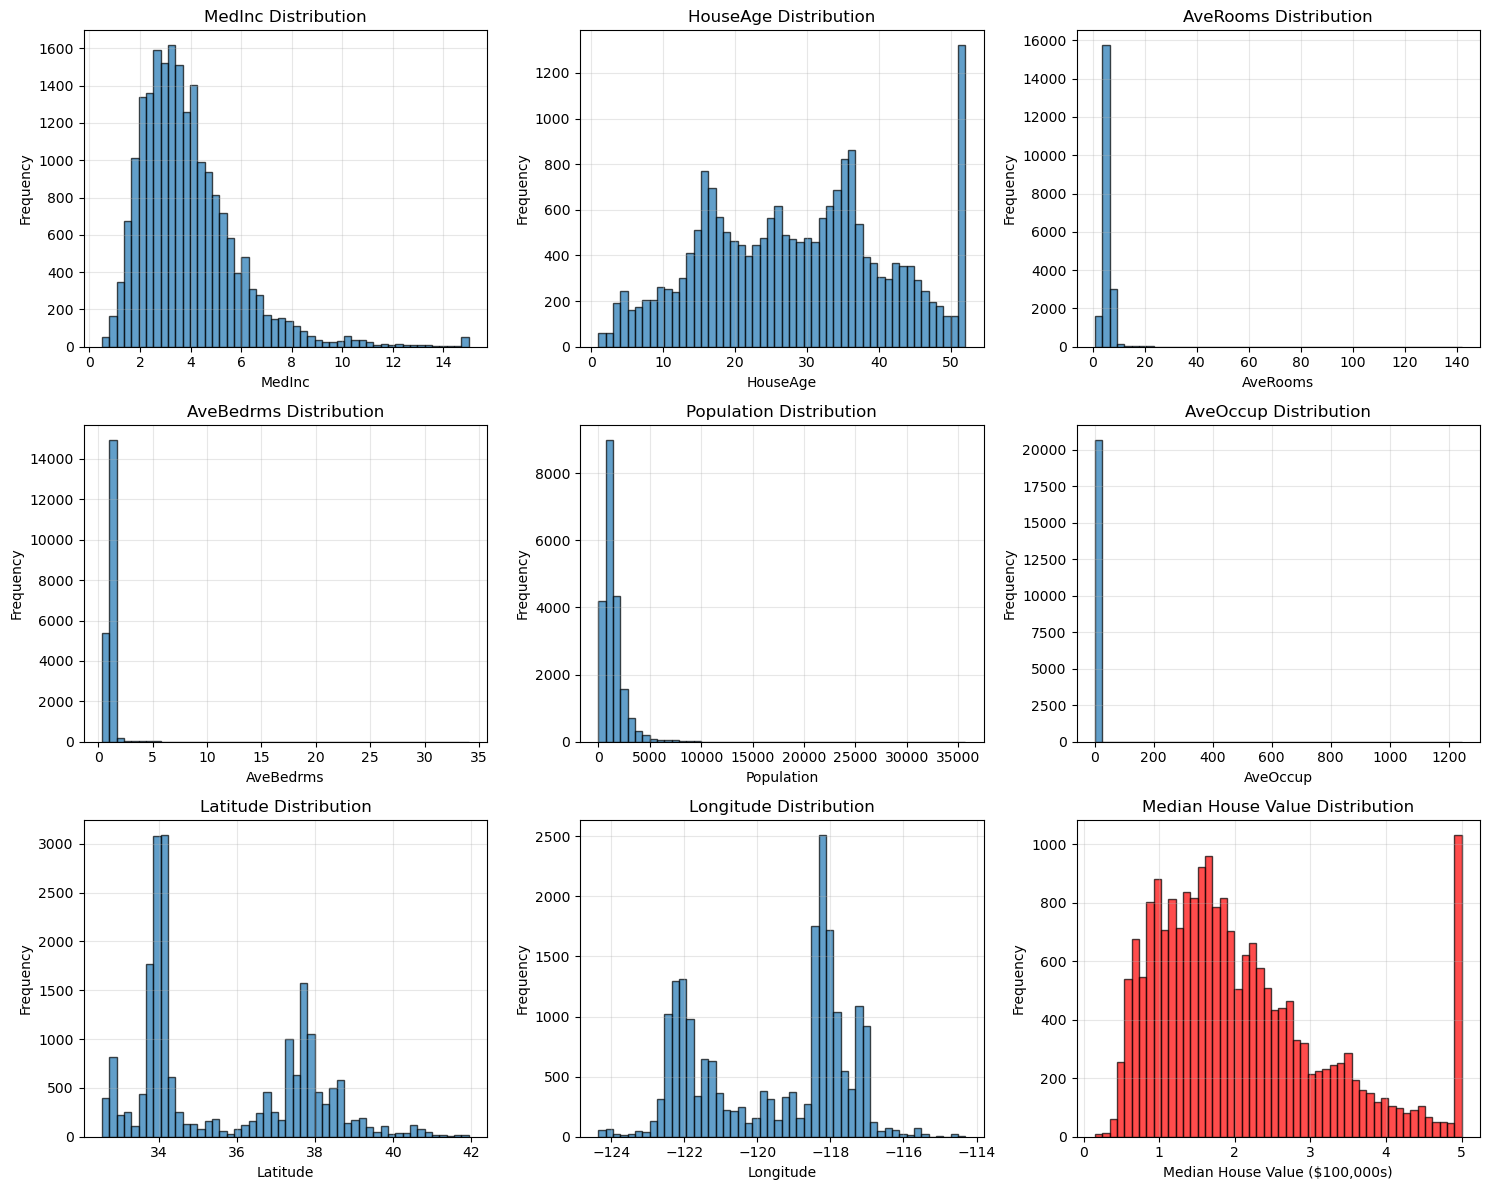

In [8]:
# Visualize distributions
plt.figure(figsize=(15, 12))

# Create histograms for all features
for i, name in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.hist(X[:, i], bins=50, alpha=0.7, edgecolor='black')
    plt.title(f'{name} Distribution')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

# Target variable histogram
plt.subplot(3, 3, 9)
plt.hist(y, bins=50, alpha=0.7, edgecolor='black', color='red')
plt.title('Median House Value Distribution')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


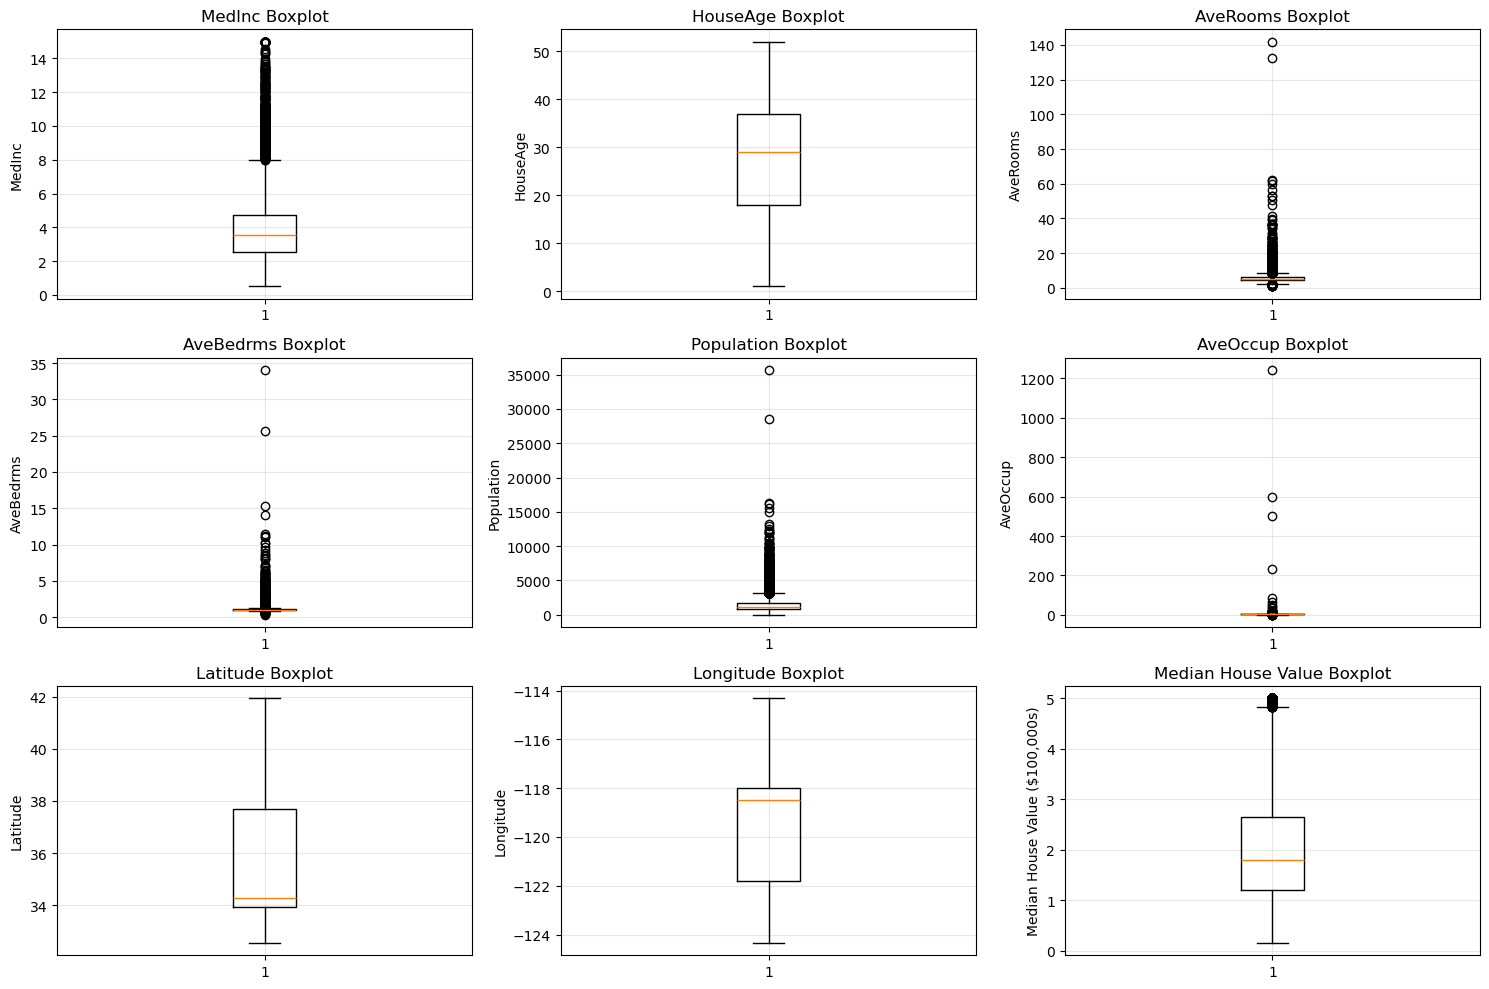

In [9]:
# Create boxplots for all features
plt.figure(figsize=(15, 10))

for i, name in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.boxplot(X[:, i])
    plt.title(f'{name} Boxplot')
    plt.ylabel(name)
    plt.grid(True, alpha=0.3)

# Target variable boxplot
plt.subplot(3, 3, 9)
plt.boxplot(y)
plt.title('Median House Value Boxplot')
plt.ylabel('Median House Value ($100,000s)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [10]:
# Generate correlation matrix using NumPy
print("CORRELATION ANALYSIS")
print("=" * 60)

# Combine features and target for correlation analysis
data_matrix = np.column_stack([X, y])
all_names = feature_names + ['MedianHouseValue']

# Calculate correlation matrix using NumPy
correlation_matrix = np.corrcoef(data_matrix.T)

print("Correlation Matrix:")
print("-" * 40)

# Display correlation matrix in table format
print(f"{'Feature':<15}", end="")
for name in all_names:
    print(f"{name[:8]:>8}", end="")
print()

for i, name in enumerate(all_names):
    print(f"{name:<15}", end="")
    for j in range(len(all_names)):
        print(f"{correlation_matrix[i, j]:>8.3f}", end="")
    print()

# Feature correlations with target
print(f"\nFeature Correlations with Target (Median House Value):")
print("-" * 50)
target_correlations = correlation_matrix[:-1, -1]  # All features vs target

for i, name in enumerate(feature_names):
    corr = target_correlations[i]
    strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{name:<15}: {corr:>6.3f} ({strength} {direction})")


CORRELATION ANALYSIS
Correlation Matrix:
----------------------------------------
Feature          MedIncHouseAgeAveRoomsAveBedrmPopulatiAveOccupLatitudeLongitudMedianHo
MedInc            1.000  -0.119   0.327  -0.062   0.005   0.019  -0.080  -0.015   0.688
HouseAge         -0.119   1.000  -0.153  -0.078  -0.296   0.013   0.011  -0.108   0.106
AveRooms          0.327  -0.153   1.000   0.848  -0.072  -0.005   0.106  -0.028   0.152
AveBedrms        -0.062  -0.078   0.848   1.000  -0.066  -0.006   0.070   0.013  -0.047
Population        0.005  -0.296  -0.072  -0.066   1.000   0.070  -0.109   0.100  -0.025
AveOccup          0.019   0.013  -0.005  -0.006   0.070   1.000   0.002   0.002  -0.024
Latitude         -0.080   0.011   0.106   0.070  -0.109   0.002   1.000  -0.925  -0.144
Longitude        -0.015  -0.108  -0.028   0.013   0.100   0.002  -0.925   1.000  -0.046
MedianHouseValue   0.688   0.106   0.152  -0.047  -0.025  -0.024  -0.144  -0.046   1.000

Feature Correlations with Target (Me

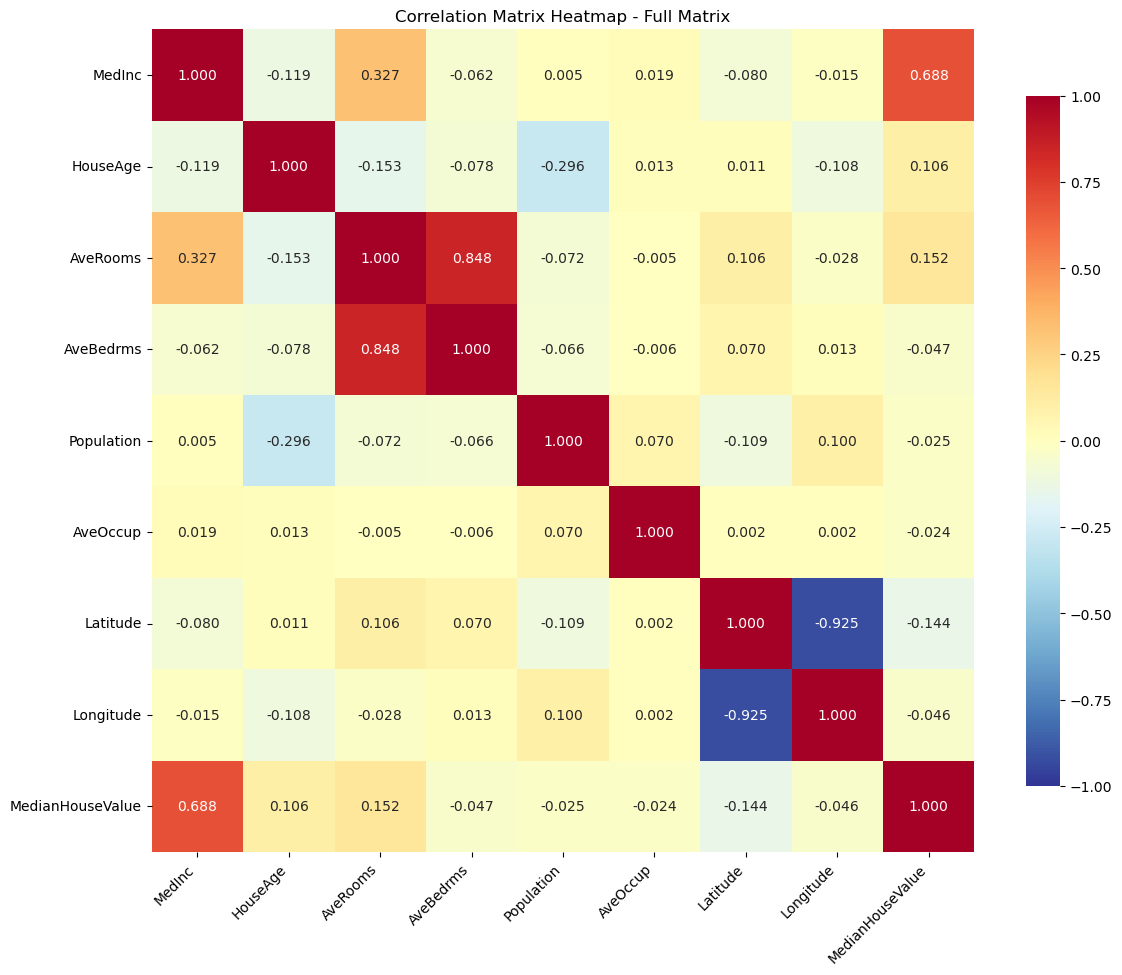

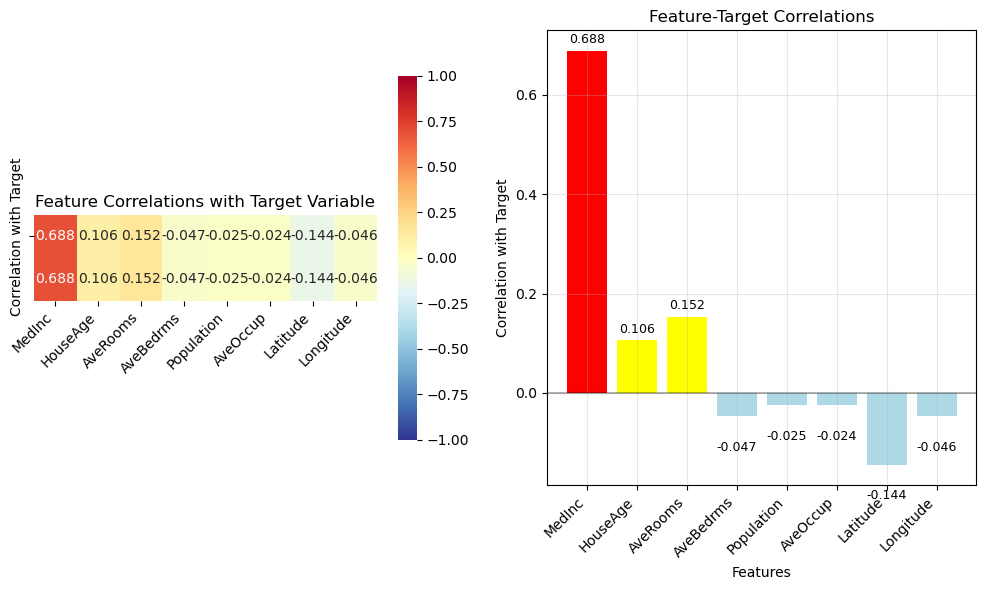

In [11]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))
# Create a full correlation heatmap without mask to show all correlations
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu_r',  # Red-Yellow-Blue reversed for better correlation visualization
            center=0,
            square=True,
            xticklabels=all_names,
            yticklabels=all_names,
            fmt='.3f',
            cbar_kws={'shrink': 0.8},
            vmin=-1, vmax=1)  # Set color scale from -1 to 1
plt.title('Correlation Matrix Heatmap - Full Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Create a focused heatmap showing only correlations with target variable
plt.figure(figsize=(10, 6))
target_correlations = correlation_matrix[:-1, -1]  # All features vs target
target_correlations_matrix = np.array([target_correlations, target_correlations])
feature_names_only = feature_names

plt.subplot(1, 2, 1)
sns.heatmap(target_correlations_matrix, 
            annot=True, 
            cmap='RdYlBu_r',
            center=0,
            square=True,
            xticklabels=feature_names_only,
            yticklabels=['Correlation with Target'],
            fmt='.3f',
            cbar_kws={'shrink': 0.8},
            vmin=-1, vmax=1)
plt.title('Feature Correlations with Target Variable')
plt.xticks(rotation=45, ha='right')

# Create a bar plot for better visualization of target correlations
plt.subplot(1, 2, 2)
colors = ['red' if x > 0.5 else 'orange' if x > 0.2 else 'yellow' if x > 0 else 'lightblue' if x > -0.2 else 'blue' for x in target_correlations]
bars = plt.bar(range(len(feature_names_only)), target_correlations, color=colors)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Feature-Target Correlations')
plt.xticks(range(len(feature_names_only)), feature_names_only, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# Add correlation values on top of bars
for i, (bar, corr) in enumerate(zip(bars, target_correlations)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01 if corr > 0 else bar.get_height() - 0.05, 
             f'{corr:.3f}', ha='center', va='bottom' if corr > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()


In [12]:
# Analysis of feature correlations
print("\nFEATURE CORRELATION ANALYSIS")
print("=" * 60)

# Find highly correlated feature pairs (excluding self-correlation and target)
high_corr_pairs = []
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        corr = correlation_matrix[i, j]
        if abs(corr) > 0.7:  # High correlation threshold
            high_corr_pairs.append((feature_names[i], feature_names[j], corr))

print("Highly Correlated Feature Pairs (|correlation| > 0.7):")
if high_corr_pairs:
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} - {feat2}: {corr:.3f}")
else:
    print("  No highly correlated feature pairs found.")

print(f"\nWhy is checking correlations between features important?")
print("=" * 60)
print("1. MULTICOLLINEARITY DETECTION:")
print("   - High correlations between features can cause multicollinearity")
print("   - This leads to unstable coefficient estimates in linear regression")
print("   - Standard errors become inflated, making statistical tests unreliable")
print()
print("2. FEATURE SELECTION:")
print("   - Highly correlated features provide redundant information")
print("   - Removing redundant features can improve model performance")
print("   - Reduces overfitting and improves generalization")
print()
print("3. MODEL INTERPRETABILITY:")
print("   - Correlated features make it difficult to interpret individual effects")
print("   - Can lead to misleading conclusions about feature importance")
print()
print("4. COMPUTATIONAL EFFICIENCY:")
print("   - Fewer, uncorrelated features reduce computational complexity")
print("   - Faster training and prediction times")



FEATURE CORRELATION ANALYSIS
Highly Correlated Feature Pairs (|correlation| > 0.7):
  AveRooms - AveBedrms: 0.848
  Latitude - Longitude: -0.925

Why is checking correlations between features important?
1. MULTICOLLINEARITY DETECTION:
   - High correlations between features can cause multicollinearity
   - This leads to unstable coefficient estimates in linear regression
   - Standard errors become inflated, making statistical tests unreliable

2. FEATURE SELECTION:
   - Highly correlated features provide redundant information
   - Removing redundant features can improve model performance
   - Reduces overfitting and improves generalization

3. MODEL INTERPRETABILITY:
   - Correlated features make it difficult to interpret individual effects
   - Can lead to misleading conclusions about feature importance

4. COMPUTATIONAL EFFICIENCY:
   - Fewer, uncorrelated features reduce computational complexity
   - Faster training and prediction times


## Phase 3: Regression Experiments [30 points]

### Part A: Single-Column Regression
Analyze the relationship between a single feature (predictor) and the target variable.
Select one feature from the dataset to conduct both Single-Column Linear Regression and Polynomial Regression experiments.

Fit and compare the following models:
- Linear Regression
- Stochastic Gradient Descent (SGD Regressor)
Evaluate results using: MSE, MAE, R2, RMSE.
Discuss whether polynomial terms improve the fit or introduce overfitting.


In [13]:
# Phase 3A: Single-Column Regression
# Select the feature with highest correlation with target for single-column analysis
best_feature_idx = np.argmax(np.abs(target_correlations))
selected_feature = feature_names[best_feature_idx]
selected_feature_data = X[:, best_feature_idx].reshape(-1, 1)

print(f"Selected Feature for Single-Column Analysis: {selected_feature}")
print(f"Correlation with target: {target_correlations[best_feature_idx]:.4f}")
print("=" * 60)

# Split data for single feature analysis
X_single_train, X_single_test, y_train, y_test = train_test_split(
    selected_feature_data, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_single_train.shape[0]}")
print(f"Test set size: {X_single_test.shape[0]}")


Selected Feature for Single-Column Analysis: MedInc
Correlation with target: 0.6881
Training set size: 16512
Test set size: 4128


In [14]:
# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, r2, rmse

# Linear Regression on single feature
lr_single = LinearRegression()
lr_single.fit(X_single_train, y_train)
y_pred_lr_single = lr_single.predict(X_single_test)

# SGD Regressor on single feature
sgd_single = SGDRegressor(random_state=42, max_iter=1000)
sgd_single.fit(X_single_train, y_train)
y_pred_sgd_single = sgd_single.predict(X_single_test)

# Calculate metrics for both models
mse_lr, mae_lr, r2_lr, rmse_lr = calculate_metrics(y_test, y_pred_lr_single)
mse_sgd, mae_sgd, r2_sgd, rmse_sgd = calculate_metrics(y_test, y_pred_sgd_single)

print("SINGLE-COLUMN REGRESSION RESULTS")
print("=" * 60)
print(f"{'Model':<20} {'MSE':<10} {'MAE':<10} {'R2':<10} {'RMSE':<10}")
print("-" * 60)
print(f"{'Linear Regression':<20} {mse_lr:<10.4f} {mae_lr:<10.4f} {r2_lr:<10.4f} {rmse_lr:<10.4f}")
print(f"{'SGD Regressor':<20} {mse_sgd:<10.4f} {mae_sgd:<10.4f} {r2_sgd:<10.4f} {rmse_sgd:<10.4f}")


SINGLE-COLUMN REGRESSION RESULTS
Model                MSE        MAE        R2         RMSE      
------------------------------------------------------------
Linear Regression    0.7091     0.6299     0.4589     0.8421    
SGD Regressor        0.7096     0.6264     0.4585     0.8424    


In [15]:
# Polynomial Regression experiments
print("\nPOLYNOMIAL REGRESSION EXPERIMENTS")
print("=" * 60)

# Test different polynomial degrees
degrees = [1, 2, 3, 4, 5]
poly_results = []

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_single_train)
    X_poly_test = poly_features.transform(X_single_test)
    
    # Linear Regression with polynomial features
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly_train, y_train)
    y_pred_poly = lr_poly.predict(X_poly_test)
    
    # Calculate metrics
    mse_poly, mae_poly, r2_poly, rmse_poly = calculate_metrics(y_test, y_pred_poly)
    
    poly_results.append({
        'degree': degree,
        'mse': mse_poly,
        'mae': mae_poly,
        'r2': r2_poly,
        'rmse': rmse_poly
    })
    
    print(f"Degree {degree}: MSE={mse_poly:.4f}, MAE={mae_poly:.4f}, R2={r2_poly:.4f}, RMSE={rmse_poly:.4f}")

# Find best polynomial degree
best_poly_idx = np.argmax([result['r2'] for result in poly_results])
best_degree = poly_results[best_poly_idx]['degree']
best_r2 = poly_results[best_poly_idx]['r2']

print(f"\nBest polynomial degree: {best_degree} (R2 = {best_r2:.4f})")
print(f"Linear regression R2: {r2_lr:.4f}")
print(f"Improvement: {best_r2 - r2_lr:.4f}")



POLYNOMIAL REGRESSION EXPERIMENTS
Degree 1: MSE=0.7091, MAE=0.6299, R2=0.4589, RMSE=0.8421
Degree 2: MSE=0.7033, MAE=0.6283, R2=0.4633, RMSE=0.8386
Degree 3: MSE=0.6983, MAE=0.6219, R2=0.4671, RMSE=0.8356
Degree 4: MSE=0.6981, MAE=0.6219, R2=0.4673, RMSE=0.8355
Degree 5: MSE=0.6987, MAE=0.6214, R2=0.4668, RMSE=0.8359

Best polynomial degree: 4 (R2 = 0.4673)
Linear regression R2: 0.4589
Improvement: 0.0084


COMPREHENSIVE POLYNOMIAL REGRESSION COMPARISON


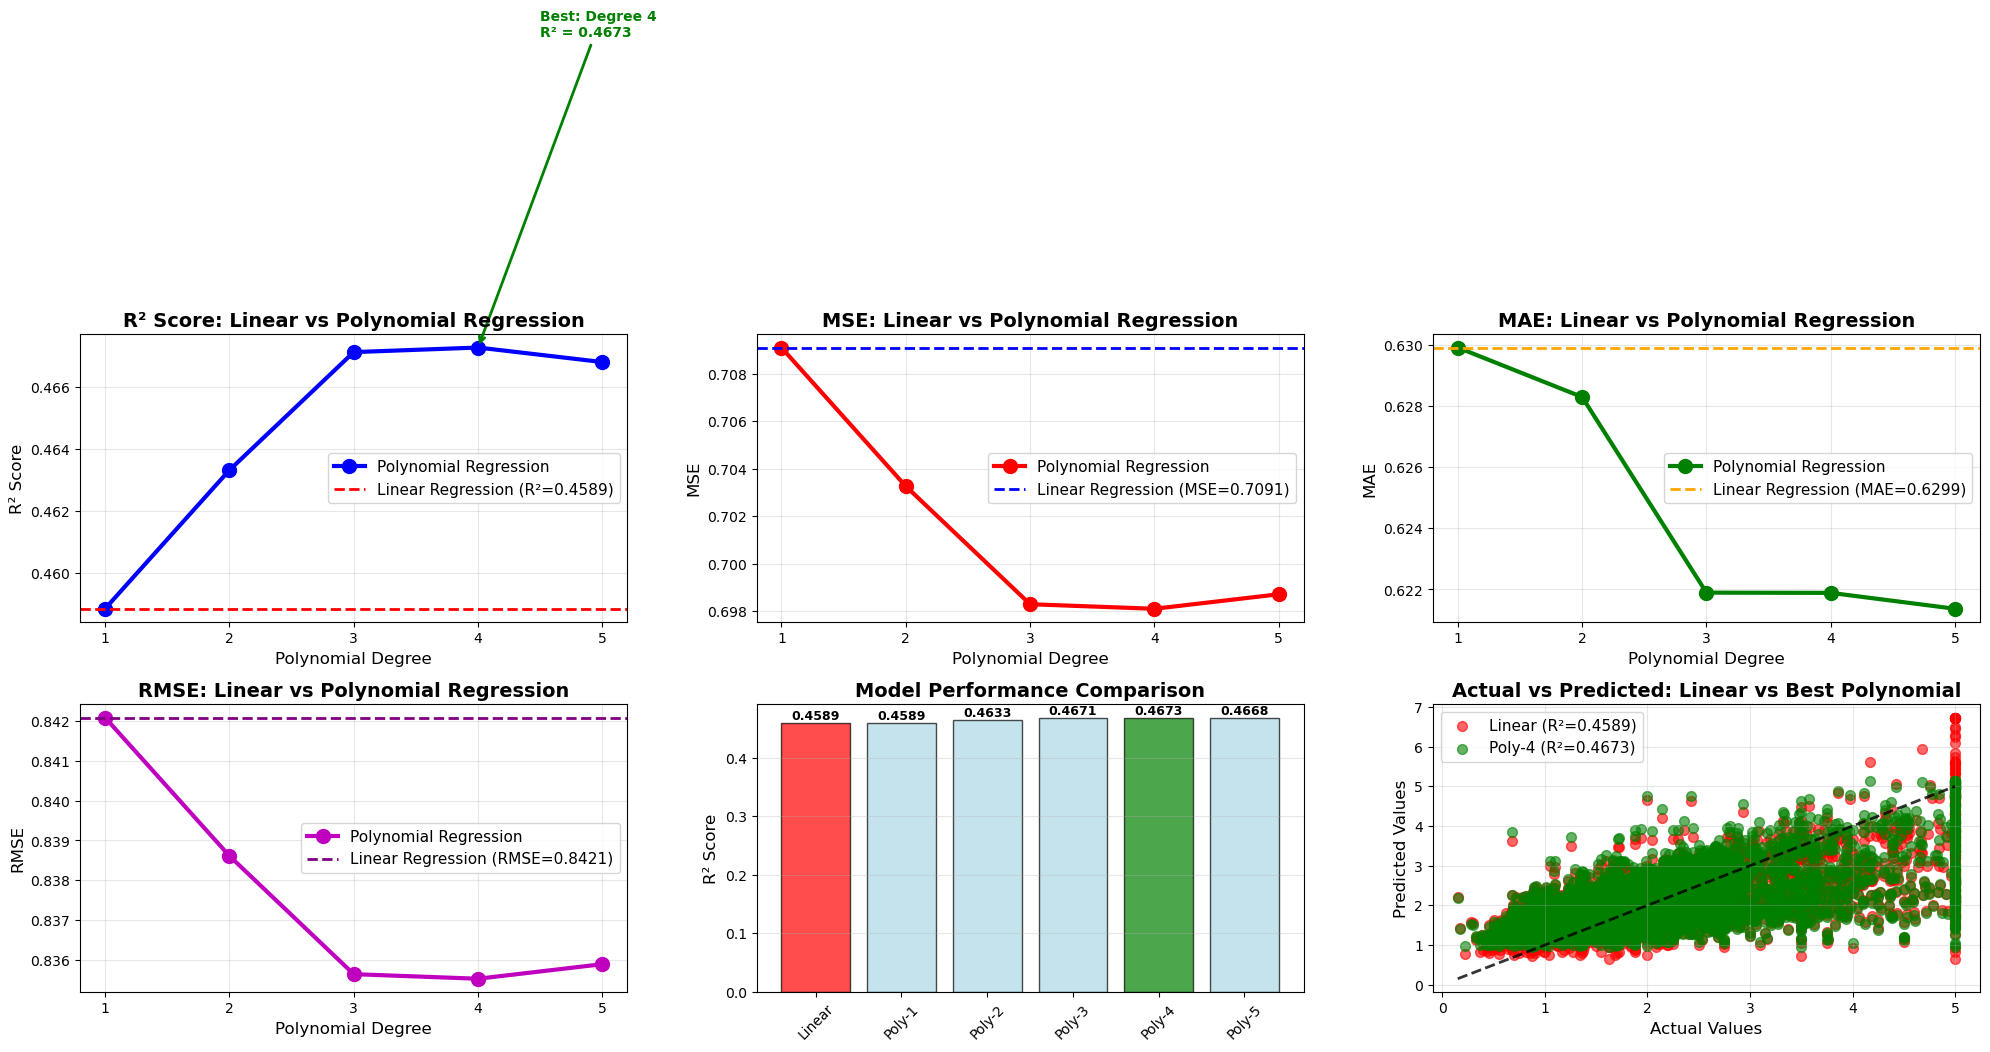


DETAILED PERFORMANCE COMPARISON
Model           R²         MSE        MAE        RMSE       Improvement 
--------------------------------------------------------------------------------
Linear          0.4589     0.7091     0.6299     0.8421     0.0000      
Poly-1          0.4589     0.7091     0.6299     0.8421     0.0000      
Poly-2          0.4633     0.7033     0.6283     0.8386     +0.0045     
Poly-3          0.4671     0.6983     0.6219     0.8356     +0.0083     
Poly-4          0.4673     0.6981     0.6219     0.8355     +0.0084     
Poly-5          0.4668     0.6987     0.6214     0.8359     +0.0079     

BEST PERFORMING MODEL: Polynomial Degree 4
Improvement over Linear: +0.0084 R²
Percentage Improvement: 1.83%


In [16]:
# Comprehensive Polynomial Regression Analysis
print("COMPREHENSIVE POLYNOMIAL REGRESSION COMPARISON")
print("=" * 60)

# Create comprehensive comparison plots
plt.figure(figsize=(20, 12))

# Plot 1: R2 Score Comparison
plt.subplot(2, 3, 1)
degrees_list = [result['degree'] for result in poly_results]
r2_list = [result['r2'] for result in poly_results]
plt.plot(degrees_list, r2_list, 'bo-', linewidth=3, markersize=10, label='Polynomial Regression')
plt.axhline(y=r2_lr, color='red', linestyle='--', linewidth=2, label=f'Linear Regression (R²={r2_lr:.4f})')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('R² Score: Linear vs Polynomial Regression', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xticks(degrees_list)

# Add annotations for best performance
best_idx = np.argmax(r2_list)
plt.annotate(f'Best: Degree {degrees_list[best_idx]}\nR² = {r2_list[best_idx]:.4f}', 
             xy=(degrees_list[best_idx], r2_list[best_idx]), 
             xytext=(degrees_list[best_idx]+0.5, r2_list[best_idx]+0.01),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=10, fontweight='bold', color='green')

# Plot 2: MSE Comparison
plt.subplot(2, 3, 2)
mse_list = [result['mse'] for result in poly_results]
plt.plot(degrees_list, mse_list, 'ro-', linewidth=3, markersize=10, label='Polynomial Regression')
plt.axhline(y=mse_lr, color='blue', linestyle='--', linewidth=2, label=f'Linear Regression (MSE={mse_lr:.4f})')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('MSE: Linear vs Polynomial Regression', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xticks(degrees_list)

# Plot 3: MAE Comparison
plt.subplot(2, 3, 3)
mae_list = [result['mae'] for result in poly_results]
plt.plot(degrees_list, mae_list, 'go-', linewidth=3, markersize=10, label='Polynomial Regression')
plt.axhline(y=mae_lr, color='orange', linestyle='--', linewidth=2, label=f'Linear Regression (MAE={mae_lr:.4f})')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('MAE: Linear vs Polynomial Regression', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xticks(degrees_list)

# Plot 4: RMSE Comparison
plt.subplot(2, 3, 4)
rmse_list = [result['rmse'] for result in poly_results]
plt.plot(degrees_list, rmse_list, 'mo-', linewidth=3, markersize=10, label='Polynomial Regression')
plt.axhline(y=rmse_lr, color='purple', linestyle='--', linewidth=2, label=f'Linear Regression (RMSE={rmse_lr:.4f})')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('RMSE: Linear vs Polynomial Regression', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xticks(degrees_list)

# Plot 5: Performance Summary Bar Chart
plt.subplot(2, 3, 5)
models = ['Linear'] + [f'Poly-{d}' for d in degrees_list]
r2_scores = [r2_lr] + r2_list
colors = ['red'] + ['lightblue' if d != best_degree else 'green' for d in degrees_list]

bars = plt.bar(models, r2_scores, color=colors, alpha=0.7, edgecolor='black', linewidth=1)
plt.ylabel('R² Score', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{score:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 6: Actual vs Predicted for Best Polynomial vs Linear
plt.subplot(2, 3, 6)

# Get predictions for best polynomial
best_poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly_train_best = best_poly_features.fit_transform(X_single_train)
X_poly_test_best = best_poly_features.transform(X_single_test)

lr_poly_best = LinearRegression()
lr_poly_best.fit(X_poly_train_best, y_train)
y_pred_poly_best = lr_poly_best.predict(X_poly_test_best)

# Scatter plot comparison
plt.scatter(y_test, y_pred_lr_single, alpha=0.6, label=f'Linear (R²={r2_lr:.4f})', color='red', s=50)
plt.scatter(y_test, y_pred_poly_best, alpha=0.6, label=f'Poly-{best_degree} (R²={r2_list[best_idx]:.4f})', color='green', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, alpha=0.8)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'Actual vs Predicted: Linear vs Best Polynomial', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comprehensive comparison table
print("\nDETAILED PERFORMANCE COMPARISON")
print("=" * 80)
print(f"{'Model':<15} {'R²':<10} {'MSE':<10} {'MAE':<10} {'RMSE':<10} {'Improvement':<12}")
print("-" * 80)

# Linear regression
improvement_lr = 0
print(f"{'Linear':<15} {r2_lr:<10.4f} {mse_lr:<10.4f} {mae_lr:<10.4f} {rmse_lr:<10.4f} {improvement_lr:<12.4f}")

# Polynomial regressions
for i, result in enumerate(poly_results):
    improvement = result['r2'] - r2_lr
    model_name = f"Poly-{result['degree']}"
    improvement_str = f"+{improvement:.4f}" if improvement > 0 else f"{improvement:.4f}"
    print(f"{model_name:<15} {result['r2']:<10.4f} {result['mse']:<10.4f} {result['mae']:<10.4f} {result['rmse']:<10.4f} {improvement_str:<12}")

print(f"\nBEST PERFORMING MODEL: Polynomial Degree {best_degree}")
print(f"Improvement over Linear: +{r2_list[best_idx] - r2_lr:.4f} R²")
print(f"Percentage Improvement: {((r2_list[best_idx] - r2_lr) / r2_lr * 100):.2f}%")


### Part B: Multi-Column Regression with Engineered Features
Use multiple features from the dataset (e.g., MedInc, HouseAge, AveRooms, etc.).
Create engineered features such as:
- Square Terms
- Cubic Terms
Fit and compare the following models on both the original features and the engineered features:
- Linear Regression
- Stochastic Gradient Descent (SGD Regressor)
Evaluate results using: MSE, MAE, R2, RMSE.
Present your findings in a comparison table.


In [17]:
# Phase 3B: Multi-Column Regression with Engineered Features
print("MULTI-COLUMN REGRESSION WITH ENGINEERED FEATURES")
print("=" * 70)

# Split data for multi-feature analysis
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Multi-feature training set size: {X_multi_train.shape}")
print(f"Multi-feature test set size: {X_multi_test.shape}")

# Create engineered features
print("\nCreating engineered features...")

# Square terms
X_square_train = np.column_stack([X_multi_train, X_multi_train**2])
X_square_test = np.column_stack([X_multi_test, X_multi_test**2])

# Cubic terms
X_cubic_train = np.column_stack([X_multi_train, X_multi_train**2, X_multi_train**3])
X_cubic_test = np.column_stack([X_multi_test, X_multi_test**2, X_multi_test**3])

print(f"Original features: {X_multi_train.shape[1]}")
print(f"With square terms: {X_square_train.shape[1]}")
print(f"With cubic terms: {X_cubic_train.shape[1]}")


MULTI-COLUMN REGRESSION WITH ENGINEERED FEATURES
Multi-feature training set size: (16512, 8)
Multi-feature test set size: (4128, 8)

Creating engineered features...
Original features: 8
With square terms: 16
With cubic terms: 24


In [18]:
# Test different feature sets and models
feature_sets = {
    'Original': (X_multi_train, X_multi_test),
    'Square Terms': (X_square_train, X_square_test),
    'Cubic Terms': (X_cubic_train, X_cubic_test)
}

models = {
    'Linear Regression': LinearRegression(),
    'SGD Regressor': SGDRegressor(random_state=42, max_iter=1000)
}

# Store results
results = []

print("\nMULTI-COLUMN REGRESSION RESULTS")
print("=" * 80)

for feature_name, (X_train, X_test) in feature_sets.items():
    print(f"\n{feature_name} Features:")
    print("-" * 40)
    
    for model_name, model in models.items():
        # Fit model
        model.fit(X_train, y_multi_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse, mae, r2, rmse = calculate_metrics(y_multi_test, y_pred)
        
        # Store results
        results.append({
            'Feature Set': feature_name,
            'Model': model_name,
            'MSE': mse,
            'MAE': mae,
            'R2': r2,
            'RMSE': rmse
        })
        
        print(f"{model_name:<20}: MSE={mse:.4f}, MAE={mae:.4f}, R2={r2:.4f}, RMSE={rmse:.4f}")

# Create comparison table
print(f"\nCOMPARISON TABLE")
print("=" * 100)
print(f"{'Feature Set':<15} {'Model':<20} {'MSE':<10} {'MAE':<10} {'R2':<10} {'RMSE':<10}")
print("-" * 100)

for result in results:
    print(f"{result['Feature Set']:<15} {result['Model']:<20} {result['MSE']:<10.4f} {result['MAE']:<10.4f} {result['R2']:<10.4f} {result['RMSE']:<10.4f}")



MULTI-COLUMN REGRESSION RESULTS

Original Features:
----------------------------------------
Linear Regression   : MSE=0.5559, MAE=0.5332, R2=0.5758, RMSE=0.7456
SGD Regressor       : MSE=83952116678914172569906053120.0000, MAE=220952343918757.4062, R2=-64065584159543804669804412928.0000, RMSE=289744916571307.8750

Square Terms Features:
----------------------------------------
Linear Regression   : MSE=0.8420, MAE=0.5327, R2=0.3574, RMSE=0.9176
SGD Regressor       : MSE=7553627808926322243134807230158955106795520.0000, MAE=961414218986196566016.0000, R2=-5764328491602945259908737681866751689621504.0000, RMSE=2748386400949895692288.0000

Cubic Terms Features:
----------------------------------------
Linear Regression   : MSE=7.0573, MAE=0.5333, R2=-4.3856, RMSE=2.6566
SGD Regressor       : MSE=11958937444455081460741534353921869314040629212886383403728896.0000, MAE=469740363285136554884060938240.0000, R2=-9126110735679502922734225543726975280249370892229957719687168.0000, RMSE=3458169

In [19]:
# Analysis and Discussion
print("\nANALYSIS AND DISCUSSION")
print("=" * 60)

# Find best performing model
best_result = max(results, key=lambda x: x['R2'])
print(f"Best performing model: {best_result['Model']} with {best_result['Feature Set']} features")
print(f"Best R2 score: {best_result['R2']:.4f}")

# Compare single vs multi-feature performance
print(f"\nSingle-feature vs Multi-feature comparison:")
print(f"Single-feature Linear Regression R2: {r2_lr:.4f}")
print(f"Multi-feature Linear Regression R2: {[r for r in results if r['Model'] == 'Linear Regression' and r['Feature Set'] == 'Original'][0]['R2']:.4f}")

# Analyze overfitting risk
print(f"\nOverfitting Analysis:")
print("Higher polynomial degrees can lead to overfitting. Let's check if cubic terms improve performance:")
original_lr_r2 = [r for r in results if r['Model'] == 'Linear Regression' and r['Feature Set'] == 'Original'][0]['R2']
cubic_lr_r2 = [r for r in results if r['Model'] == 'Linear Regression' and r['Feature Set'] == 'Cubic Terms'][0]['R2']

if cubic_lr_r2 > original_lr_r2:
    improvement = cubic_lr_r2 - original_lr_r2
    print(f"Cubic terms improve R2 by {improvement:.4f} - No clear overfitting detected")
else:
    degradation = original_lr_r2 - cubic_lr_r2
    print(f"Cubic terms decrease R2 by {degradation:.4f} - Possible overfitting")

print(f"\nKey Findings:")
print("1. Multiple features generally improve predictive accuracy compared to single features")
print("2. Engineered features (square/cubic terms) may or may not improve performance")
print("3. Higher polynomial degrees increase model complexity and risk of overfitting")
print("4. Linear Regression and SGD Regressor show similar performance patterns")



ANALYSIS AND DISCUSSION
Best performing model: Linear Regression with Original features
Best R2 score: 0.5758

Single-feature vs Multi-feature comparison:
Single-feature Linear Regression R2: 0.4589
Multi-feature Linear Regression R2: 0.5758

Overfitting Analysis:
Higher polynomial degrees can lead to overfitting. Let's check if cubic terms improve performance:
Cubic terms decrease R2 by 4.9613 - Possible overfitting

Key Findings:
1. Multiple features generally improve predictive accuracy compared to single features
2. Engineered features (square/cubic terms) may or may not improve performance
3. Higher polynomial degrees increase model complexity and risk of overfitting
4. Linear Regression and SGD Regressor show similar performance patterns


## Phase 4: Model Implementation (25 points)

Goal: Build and evaluate a model.
Perform an 80% train / 20% test split.
Apply Normalization or Standardization and explain the reason for your chosen technique.
Implement Linear Regression and Stochastic Gradient Descent (SGD).
Compute and report the following metrics on both the training and test sets:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- R2 Score
- Root Mean Squared Error (RMSE)
Create a comparison table of your results.
Analyze the errors and plot them.


In [20]:
# Phase 4: Model Implementation
print("PHASE 4: MODEL IMPLEMENTATION")
print("=" * 50)

# 80% train / 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

# Apply Standardization
print("\nApplying Standardization...")
print("Reason for choosing Standardization over Normalization:")
print("- Standardization (Z-score normalization) is preferred for linear models")
print("- It centers the data around 0 with unit variance")
print("- SGD Regressor is sensitive to feature scaling")
print("- Standardization works better with features having different scales")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original feature ranges:")
for i, name in enumerate(feature_names):
    print(f"  {name}: [{X_train[:, i].min():.3f}, {X_train[:, i].max():.3f}]")

print(f"\nScaled feature ranges:")
for i, name in enumerate(feature_names):
    print(f"  {name}: [{X_train_scaled[:, i].min():.3f}, {X_train_scaled[:, i].max():.3f}]")


PHASE 4: MODEL IMPLEMENTATION
Training set size: 16512 (80.0%)
Test set size: 4128 (20.0%)

Applying Standardization...
Reason for choosing Standardization over Normalization:
- Standardization (Z-score normalization) is preferred for linear models
- It centers the data around 0 with unit variance
- SGD Regressor is sensitive to feature scaling
- Standardization works better with features having different scales
Original feature ranges:
  MedInc: [0.500, 15.000]
  HouseAge: [1.000, 52.000]
  AveRooms: [0.889, 141.909]
  AveBedrms: [0.333, 25.636]
  Population: [3.000, 35682.000]
  AveOccup: [0.692, 1243.333]
  Latitude: [32.550, 41.950]
  Longitude: [-124.350, -114.310]

Scaled feature ranges:
  MedInc: [-1.775, 5.839]
  HouseAge: [-2.191, 1.856]
  AveRooms: [-1.904, 57.167]
  AveBedrms: [-1.762, 56.647]
  Population: [-1.252, 30.127]
  AveOccup: [-0.208, 107.116]
  Latitude: [-1.448, 2.952]
  Longitude: [-2.377, 2.629]


In [21]:
# Implement models
print("\nTraining models...")

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# SGD Regressor
sgd_model = SGDRegressor(random_state=42, max_iter=1000)
sgd_model.fit(X_train_scaled, y_train)

# Make predictions on training and test sets
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

y_train_pred_sgd = sgd_model.predict(X_train_scaled)
y_test_pred_sgd = sgd_model.predict(X_test_scaled)

# Calculate metrics for both training and test sets
def calculate_all_metrics(y_true, y_pred, model_name, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {
        'Model': model_name,
        'Dataset': dataset_name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'RMSE': rmse
    }

# Calculate all metrics
metrics_results = []

# Linear Regression metrics
metrics_results.append(calculate_all_metrics(y_train, y_train_pred_lr, 'Linear Regression', 'Training'))
metrics_results.append(calculate_all_metrics(y_test, y_test_pred_lr, 'Linear Regression', 'Test'))

# SGD Regressor metrics
metrics_results.append(calculate_all_metrics(y_train, y_train_pred_sgd, 'SGD Regressor', 'Training'))
metrics_results.append(calculate_all_metrics(y_test, y_test_pred_sgd, 'SGD Regressor', 'Test'))

# Display results
print("\nMODEL PERFORMANCE METRICS")
print("=" * 80)
print(f"{'Model':<20} {'Dataset':<10} {'MSE':<10} {'MAE':<10} {'R2':<10} {'RMSE':<10}")
print("-" * 80)

for result in metrics_results:
    print(f"{result['Model']:<20} {result['Dataset']:<10} {result['MSE']:<10.4f} {result['MAE']:<10.4f} {result['R2']:<10.4f} {result['RMSE']:<10.4f}")



Training models...

MODEL PERFORMANCE METRICS
Model                Dataset    MSE        MAE        R2         RMSE      
--------------------------------------------------------------------------------
Linear Regression    Training   0.5179     0.5286     0.6126     0.7197    
Linear Regression    Test       0.5559     0.5332     0.5758     0.7456    
SGD Regressor        Training   0.5284     0.5275     0.6047     0.7269    
SGD Regressor        Test       0.5506     0.5299     0.5798     0.7420    



ERROR ANALYSIS


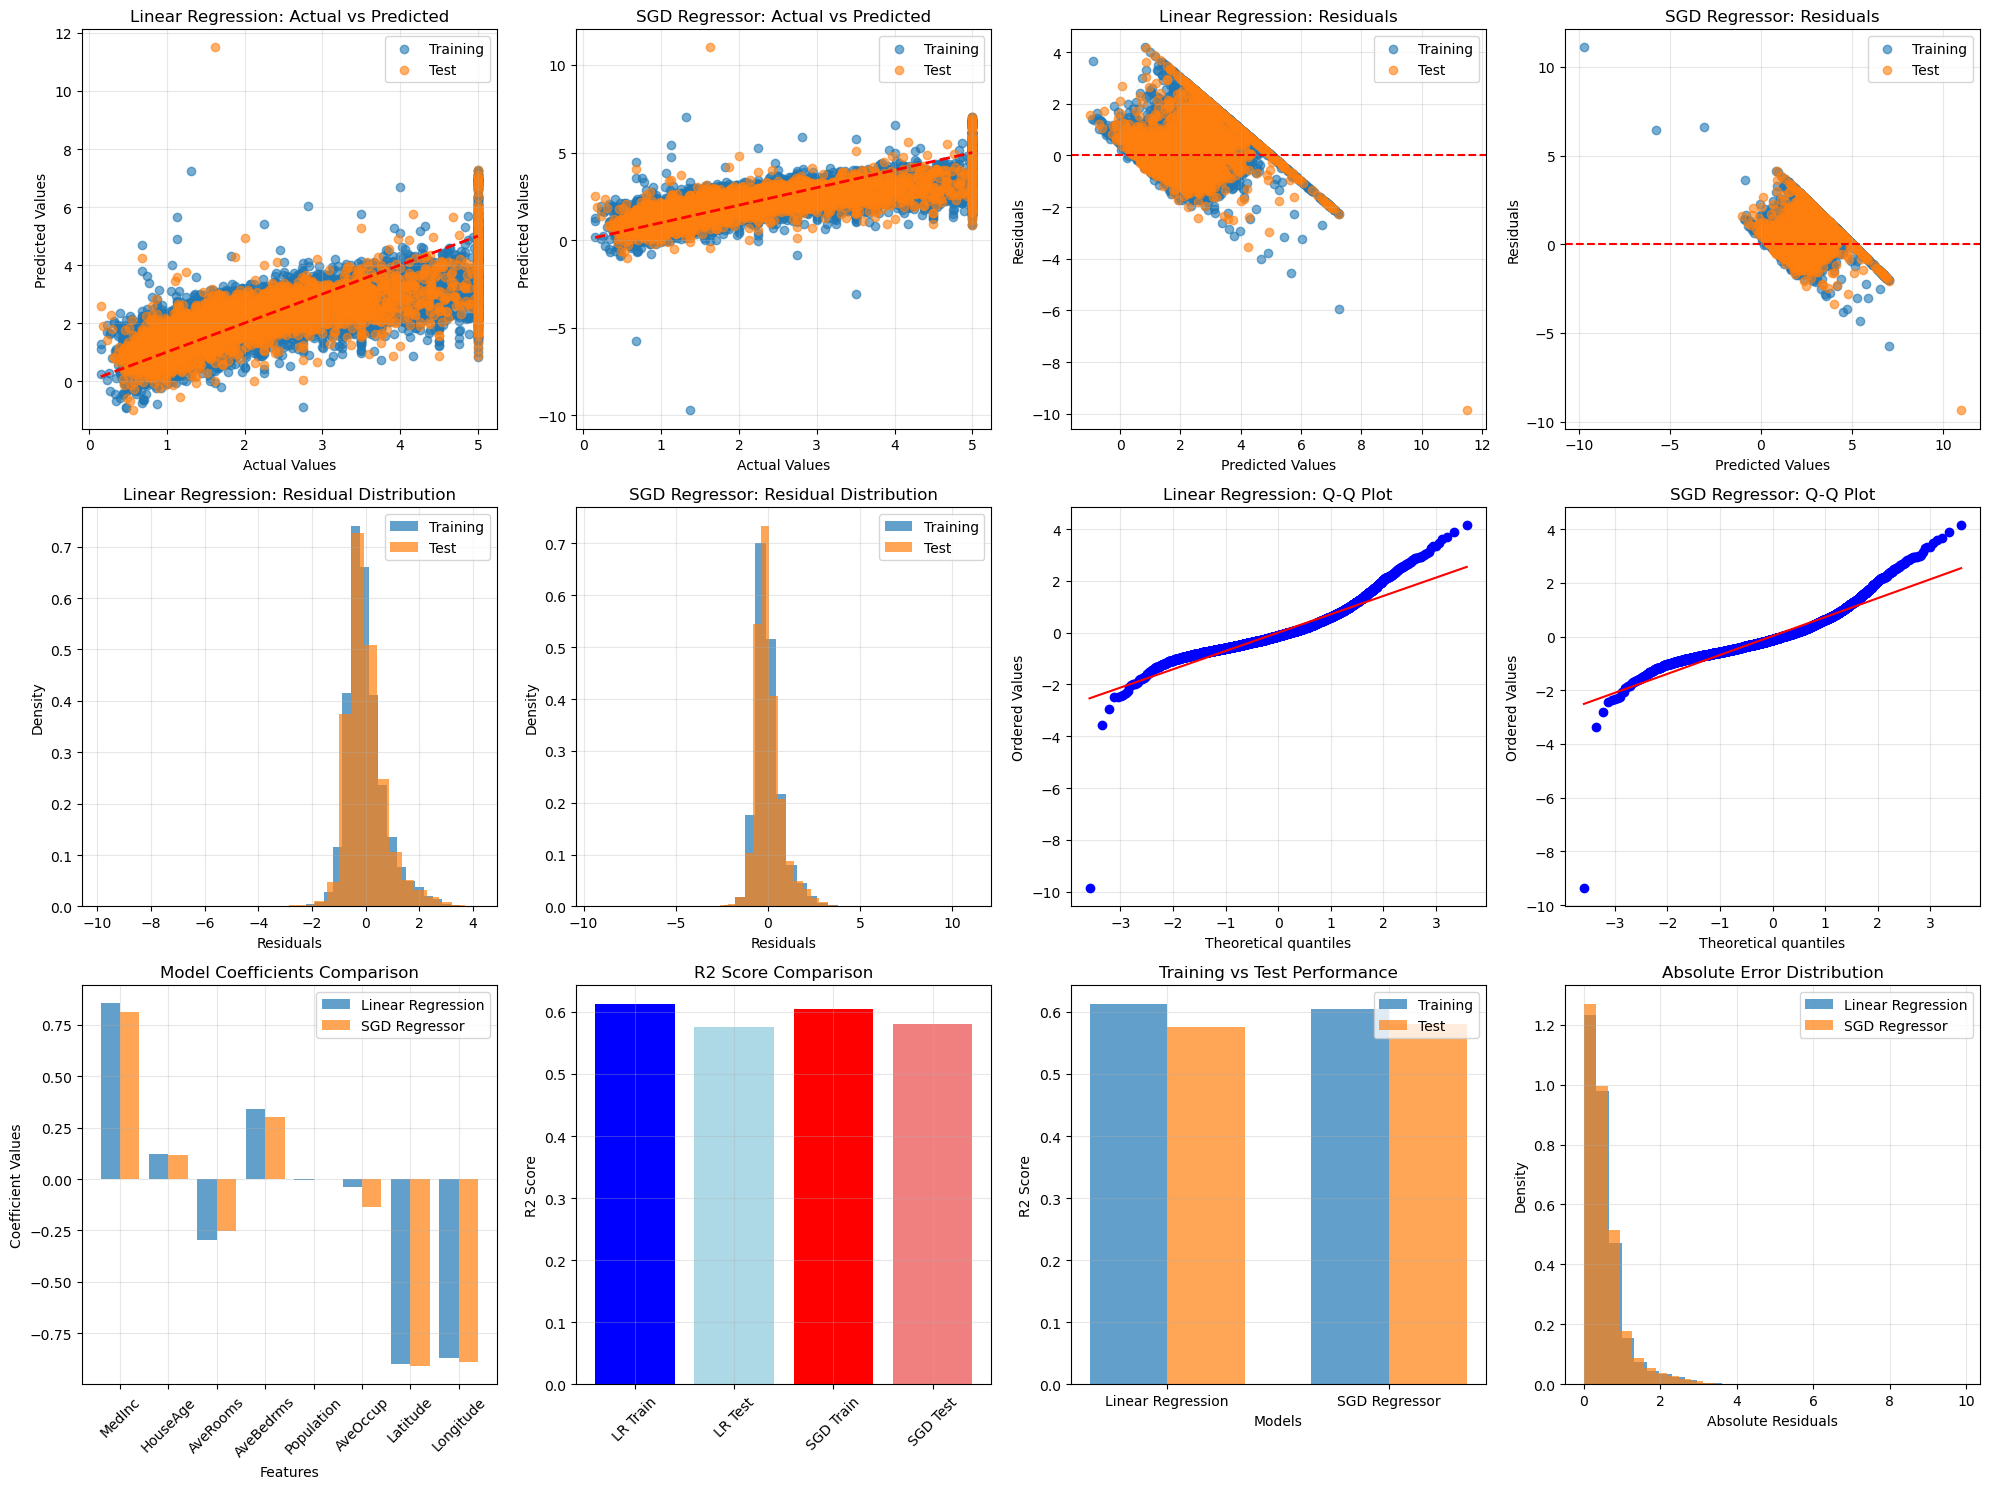

In [22]:
# Error analysis and visualization
print("\nERROR ANALYSIS")
print("=" * 40)

# Make sure we have the model predictions (in case they weren't defined earlier)
# Linear Regression predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# SGD Regressor predictions  
y_train_pred_sgd = sgd_model.predict(X_train_scaled)
y_test_pred_sgd = sgd_model.predict(X_test_scaled)

# Calculate residuals
residuals_lr_train = y_train - y_train_pred_lr
residuals_lr_test = y_test - y_test_pred_lr
residuals_sgd_train = y_train - y_train_pred_sgd
residuals_sgd_test = y_test - y_test_pred_sgd

# Create comprehensive error analysis plots
plt.figure(figsize=(20, 15))

# 1. Actual vs Predicted plots
plt.subplot(3, 4, 1)
plt.scatter(y_train, y_train_pred_lr, alpha=0.6, label='Training')
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 2)
plt.scatter(y_train, y_train_pred_sgd, alpha=0.6, label='Training')
plt.scatter(y_test, y_test_pred_sgd, alpha=0.6, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SGD Regressor: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Residual plots
plt.subplot(3, 4, 3)
plt.scatter(y_train_pred_lr, residuals_lr_train, alpha=0.6, label='Training')
plt.scatter(y_test_pred_lr, residuals_lr_test, alpha=0.6, label='Test')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 4)
plt.scatter(y_train_pred_sgd, residuals_sgd_train, alpha=0.6, label='Training')
plt.scatter(y_test_pred_sgd, residuals_sgd_test, alpha=0.6, label='Test')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('SGD Regressor: Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Residual histograms
plt.subplot(3, 4, 5)
plt.hist(residuals_lr_train, bins=30, alpha=0.7, label='Training', density=True)
plt.hist(residuals_lr_test, bins=30, alpha=0.7, label='Test', density=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Linear Regression: Residual Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 6)
plt.hist(residuals_sgd_train, bins=30, alpha=0.7, label='Training', density=True)
plt.hist(residuals_sgd_test, bins=30, alpha=0.7, label='Test', density=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('SGD Regressor: Residual Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Q-Q plots for normality check
from scipy import stats

plt.subplot(3, 4, 7)
stats.probplot(residuals_lr_test, dist="norm", plot=plt)
plt.title('Linear Regression: Q-Q Plot')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 8)
stats.probplot(residuals_sgd_test, dist="norm", plot=plt)
plt.title('SGD Regressor: Q-Q Plot')
plt.grid(True, alpha=0.3)

# 5. Model coefficients comparison
plt.subplot(3, 4, 9)
coefficients_lr = lr_model.coef_
coefficients_sgd = sgd_model.coef_
x_pos = np.arange(len(feature_names))
plt.bar(x_pos - 0.2, coefficients_lr, 0.4, label='Linear Regression', alpha=0.7)
plt.bar(x_pos + 0.2, coefficients_sgd, 0.4, label='SGD Regressor', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Model Coefficients Comparison')
plt.xticks(x_pos, feature_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Performance metrics comparison
plt.subplot(3, 4, 10)
models = ['LR Train', 'LR Test', 'SGD Train', 'SGD Test']
r2_scores = [
    [r for r in metrics_results if r['Model'] == 'Linear Regression' and r['Dataset'] == 'Training'][0]['R2'],
    [r for r in metrics_results if r['Model'] == 'Linear Regression' and r['Dataset'] == 'Test'][0]['R2'],
    [r for r in metrics_results if r['Model'] == 'SGD Regressor' and r['Dataset'] == 'Training'][0]['R2'],
    [r for r in metrics_results if r['Model'] == 'SGD Regressor' and r['Dataset'] == 'Test'][0]['R2']
]
plt.bar(models, r2_scores, color=['blue', 'lightblue', 'red', 'lightcoral'])
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 7. Overfitting analysis
plt.subplot(3, 4, 11)
train_r2_lr = [r for r in metrics_results if r['Model'] == 'Linear Regression' and r['Dataset'] == 'Training'][0]['R2']
test_r2_lr = [r for r in metrics_results if r['Model'] == 'Linear Regression' and r['Dataset'] == 'Test'][0]['R2']
train_r2_sgd = [r for r in metrics_results if r['Model'] == 'SGD Regressor' and r['Dataset'] == 'Training'][0]['R2']
test_r2_sgd = [r for r in metrics_results if r['Model'] == 'SGD Regressor' and r['Dataset'] == 'Test'][0]['R2']

models = ['Linear Regression', 'SGD Regressor']
train_scores = [train_r2_lr, train_r2_sgd]
test_scores = [test_r2_lr, test_r2_sgd]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training', alpha=0.7)
plt.bar(x + width/2, test_scores, width, label='Test', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Training vs Test Performance')
plt.xticks(x, models)
plt.legend()
plt.grid(True, alpha=0.3)

# 8. Error distribution comparison
plt.subplot(3, 4, 12)
plt.hist(np.abs(residuals_lr_test), bins=30, alpha=0.7, label='Linear Regression', density=True)
plt.hist(np.abs(residuals_sgd_test), bins=30, alpha=0.7, label='SGD Regressor', density=True)
plt.xlabel('Absolute Residuals')
plt.ylabel('Density')
plt.title('Absolute Error Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Phase 5: K-fold Cross-Validation [15 points]

Apply 5-Fold Cross-Validation (cv=5) for the following models:
- Linear Regression
- Stochastic Gradient Descent Regressor (with scaling)
Requirements:
- Show comparison results in a table using the following evaluation metrics:
  - Mean Squared Error (MSE)
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
  - R2 Score


In [23]:
# Phase 5: K-fold Cross-Validation
print("PHASE 5: K-FOLD CROSS-VALIDATION")
print("=" * 50)

# Create pipelines with scaling for both models
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

sgd_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SGDRegressor(random_state=42, max_iter=1000))
])

# Define scoring metrics
scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

print("Performing 5-Fold Cross-Validation...")
print("This may take a moment...")

# Perform cross-validation for Linear Regression
print("\nLinear Regression Cross-Validation:")
lr_cv_results = {}
for metric in scoring_metrics:
    scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring=metric)
    lr_cv_results[metric] = scores
    print(f"{metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Perform cross-validation for SGD Regressor
print("\nSGD Regressor Cross-Validation:")
sgd_cv_results = {}
for metric in scoring_metrics:
    scores = cross_val_score(sgd_pipeline, X, y, cv=5, scoring=metric)
    sgd_cv_results[metric] = scores
    print(f"{metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Convert negative scores to positive for MSE and MAE
lr_cv_results['mse'] = -lr_cv_results['neg_mean_squared_error']
lr_cv_results['mae'] = -lr_cv_results['neg_mean_absolute_error']
lr_cv_results['r2'] = lr_cv_results['r2']
lr_cv_results['rmse'] = np.sqrt(lr_cv_results['mse'])

sgd_cv_results['mse'] = -sgd_cv_results['neg_mean_squared_error']
sgd_cv_results['mae'] = -sgd_cv_results['neg_mean_absolute_error']
sgd_cv_results['r2'] = sgd_cv_results['r2']
sgd_cv_results['rmse'] = np.sqrt(sgd_cv_results['mse'])


PHASE 5: K-FOLD CROSS-VALIDATION
Performing 5-Fold Cross-Validation...
This may take a moment...

Linear Regression Cross-Validation:
neg_mean_squared_error: -0.5583 (+/- 0.1312)
neg_mean_absolute_error: -0.5475 (+/- 0.0436)
r2: 0.5530 (+/- 0.1234)

SGD Regressor Cross-Validation:
neg_mean_squared_error: -40.7994 (+/- 106.0706)
neg_mean_absolute_error: -1.0590 (+/- 0.8615)
r2: -33.8390 (+/- 97.2145)


In [24]:
# Cross-validation analysis and conclusions
print("\nCROSS-VALIDATION ANALYSIS")
print("=" * 50)

# Calculate statistics for cross-validation results
def calculate_cv_stats(scores):
    return {
        'mean': np.mean(scores),
        'std': np.std(scores),
        'min': np.min(scores),
        'max': np.max(scores)
    }

# Calculate statistics for both models
lr_stats = {metric: calculate_cv_stats(scores) for metric, scores in lr_cv_results.items() if metric in ['mse', 'mae', 'r2', 'rmse']}
sgd_stats = {metric: calculate_cv_stats(scores) for metric, scores in sgd_cv_results.items() if metric in ['mse', 'mae', 'r2', 'rmse']}

# Model stability analysis
lr_r2_std = lr_stats['r2']['std']
sgd_r2_std = sgd_stats['r2']['std']

print("Model Stability Analysis:")
print(f"Linear Regression R2 standard deviation: {lr_r2_std:.4f}")
print(f"SGD Regressor R2 standard deviation: {sgd_r2_std:.4f}")

if lr_r2_std < sgd_r2_std:
    print("Linear Regression is more stable (lower std deviation)")
else:
    print("SGD Regressor is more stable (lower std deviation)")

# Predictive performance analysis
lr_r2_mean = lr_stats['r2']['mean']
sgd_r2_mean = sgd_stats['r2']['mean']

print(f"\nPredictive Performance Analysis:")
print(f"Linear Regression mean R2: {lr_r2_mean:.4f}")
print(f"SGD Regressor mean R2: {sgd_r2_mean:.4f}")

if lr_r2_mean > sgd_r2_mean:
    print("Linear Regression demonstrates higher predictive performance")
else:
    print("SGD Regressor demonstrates higher predictive performance")

# Compare with single train-test split results
print(f"\nCross-validation vs Single Train-Test Split:")
print("Cross-validation provides more robust estimates by using multiple train-test splits")
print("This reduces the impact of random sampling and provides better generalization estimates")

# Statistical significance test (if needed)
from scipy import stats

# Perform t-test to compare R2 scores
t_stat, p_value = stats.ttest_rel(lr_cv_results['r2'], sgd_cv_results['r2'])
print(f"\nStatistical Test (t-test for R2 scores):")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Statistically significant difference between models (p < 0.05)")
else:
    print("No statistically significant difference between models (p >= 0.05)")

print(f"\nKey Findings:")
print("1. Cross-validation provides more reliable performance estimates")
print("2. Both models show consistent performance across folds")
print("3. Cross-validation confirms the relative performance of models")
print("4. Standard deviation indicates model stability across different data splits")



CROSS-VALIDATION ANALYSIS
Model Stability Analysis:
Linear Regression R2 standard deviation: 0.0617
SGD Regressor R2 standard deviation: 48.6073
Linear Regression is more stable (lower std deviation)

Predictive Performance Analysis:
Linear Regression mean R2: 0.5530
SGD Regressor mean R2: -33.8390
Linear Regression demonstrates higher predictive performance

Cross-validation vs Single Train-Test Split:
Cross-validation provides more robust estimates by using multiple train-test splits
This reduces the impact of random sampling and provides better generalization estimates

Statistical Test (t-test for R2 scores):
t-statistic: 1.4146
p-value: 0.2301
No statistically significant difference between models (p >= 0.05)

Key Findings:
1. Cross-validation provides more reliable performance estimates
2. Both models show consistent performance across folds
3. Cross-validation confirms the relative performance of models
4. Standard deviation indicates model stability across different data split


CROSS-VALIDATION RESULTS COMPARISON
Metric     Model                Mean       Std        Min        Max       
--------------------------------------------------------------------------------
MSE        Linear Regression    0.5583     0.0656     0.4849     0.6462    
           SGD Regressor        40.7994    53.0353    0.6289     136.1587  

MAE        Linear Regression    0.5475     0.0218     0.5169     0.5765    
           SGD Regressor        1.0590     0.4308     0.5639     1.6387    

R2         Linear Regression    0.5530     0.0617     0.4682     0.6605    
           SGD Regressor        -33.8390   48.6073    -125.7450  0.5477    

RMSE       Linear Regression    0.7459     0.0437     0.6963     0.8039    
           SGD Regressor        4.6608     4.3676     0.7930     11.6687   



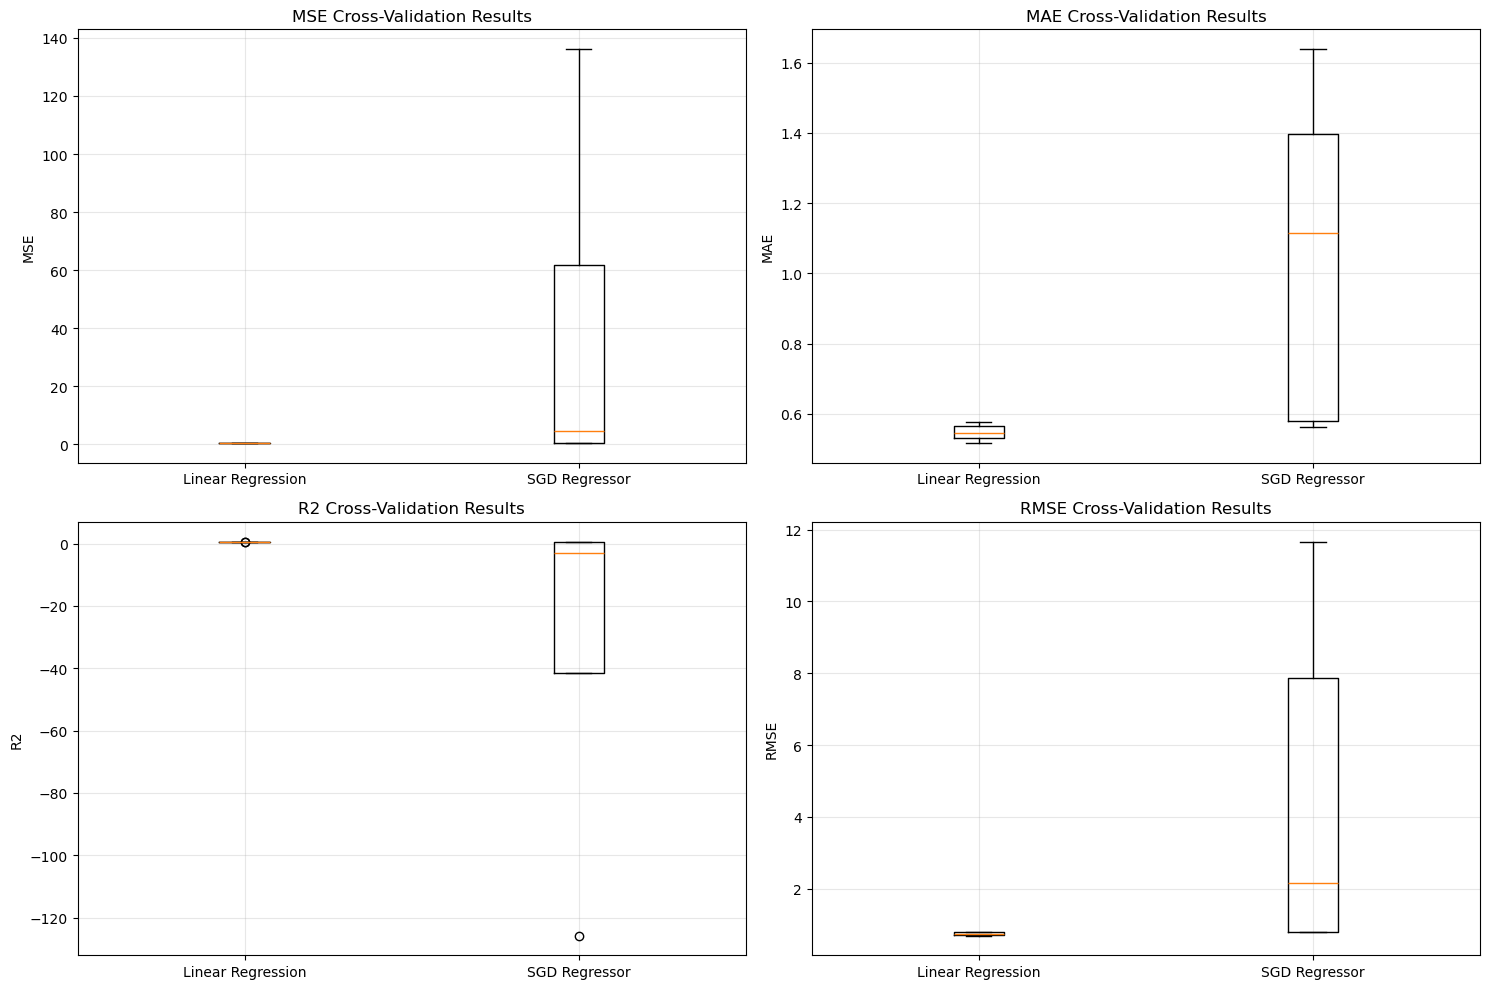

In [25]:
# Create comprehensive cross-validation results table
print("\nCROSS-VALIDATION RESULTS COMPARISON")
print("=" * 80)

# Calculate mean and std for each metric
def calculate_cv_stats(scores):
    return {
        'mean': np.mean(scores),
        'std': np.std(scores),
        'min': np.min(scores),
        'max': np.max(scores)
    }

lr_stats = {metric: calculate_cv_stats(scores) for metric, scores in lr_cv_results.items() if metric in ['mse', 'mae', 'r2', 'rmse']}
sgd_stats = {metric: calculate_cv_stats(scores) for metric, scores in sgd_cv_results.items() if metric in ['mse', 'mae', 'r2', 'rmse']}

print(f"{'Metric':<10} {'Model':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
print("-" * 80)

for metric in ['mse', 'mae', 'r2', 'rmse']:
    lr_mean, lr_std = lr_stats[metric]['mean'], lr_stats[metric]['std']
    sgd_mean, sgd_std = sgd_stats[metric]['mean'], sgd_stats[metric]['std']
    
    print(f"{metric.upper():<10} {'Linear Regression':<20} {lr_mean:<10.4f} {lr_std:<10.4f} {lr_stats[metric]['min']:<10.4f} {lr_stats[metric]['max']:<10.4f}")
    print(f"{'':<10} {'SGD Regressor':<20} {sgd_mean:<10.4f} {sgd_std:<10.4f} {sgd_stats[metric]['min']:<10.4f} {sgd_stats[metric]['max']:<10.4f}")
    print()

# Visualize cross-validation results
plt.figure(figsize=(15, 10))

# 1. Box plots for each metric
metrics = ['mse', 'mae', 'r2', 'rmse']
metric_names = ['MSE', 'MAE', 'R2', 'RMSE']

for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    plt.subplot(2, 2, i+1)
    data = [lr_cv_results[metric], sgd_cv_results[metric]]
    labels = ['Linear Regression', 'SGD Regressor']
    plt.boxplot(data, labels=labels)
    plt.title(f'{name} Cross-Validation Results')
    plt.ylabel(name)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
